In [1]:
integral_count = 1000

def integral_by_trapezoidal_rule(f, start_x, end_x):
    sum = 0
    width = (end_x - start_x) / integral_count
    for i in range(integral_count):
        area = width * (f(start_x + i*width) + f(start_x + (i + 1)*width)) / 2
#         if i==500:
#             print(area)
        sum += area
    
    return sum


# # 積分関数正しいかチェック
# area = integral_by_trapezoidal_rule(y, 0, 30)
# print(area)

# def y(x):
#     return x

In [2]:
# 方程式を定義
import numpy as np
import math
import functools

def func_r(q):
    value = q / (1 - b + b * q) ** 2
    return value


def func_g_integrand(z, m, q):
    integrand = (1 / math.sqrt(2 * np.pi)) * math.exp(-z**2/2) * np.tanh(b * (m + math.sqrt(a * func_r(q)) * z)) ** 2
    return integrand

    
def func_f_integrand(z, m, q):
    integrand =  (1 / math.sqrt(2 * np.pi)) * math.exp(-z**2/2) * np.tanh(b * (m + math.sqrt(a * func_r(q)) * z))
    return integrand
    

def func_g(m, q):
    func = functools.partial(func_g_integrand, m=m, q=q)
    value =  integral_by_trapezoidal_rule(func,  -1000, 1000)
    return value
    
    
def func_f(m, q):
    func = functools.partial(func_f_integrand, m=m, q=q)
    value = integral_by_trapezoidal_rule(func,  -1000, 1000)
    return value


# ニュートン法の更新式を定義

def differential_of_sqrt_r(q):
    value_1 = 1 / (2 * math.sqrt(r(q)) )
    denominator_of_value_2 = 1 - 2*q * (b-1-q) - (b-1-q)**2
    numerator_of_value_2 = (1 - (b-1-q)**2 )**2
    return value_1 * numerator_of_value_2 / denominator_of_value_2
    

# j11
def j_11_integrand(z, m, q):
    integrand =  (1 / math.sqrt(2 * np.pi)) * math.exp(-z**2/2) / np.cosh(b * (m + math.sqrt(a * r(q)) * z))**2    * b
    return integrand
    
def j_11(m, q):
    func = functools.partial(j_11_integrand, m=m, q=q)
    return 1 - integral_by_trapezoidal_rule(func, -100, 100)    


# j12
def j_12_integrand(z, m, q):
    integrand =  (1 / math.sqrt(2 * np.pi)) * math.exp(-z**2/2) / np.cosh(b * (m + math.sqrt(a * r(q)) * z))**2    * math.sqrt(a)*z* differential_of_sqrt_r(q)
    return integrand
    
def j_12(m, q):
    func = functools.partial(j_12_integrand, m=m, q=q)
    return 1 - integral_by_trapezoidal_rule(func, -100, 100)

    
# j21
def j_21_integrand(z, m, q):
    integrand =  (1 / math.sqrt(2 * np.pi)) * math.exp(-z**2/2) / np.cosh(b * (m + math.sqrt(a * r(q)) * z))**2    * b    * 2*np.tanh(b * (m + math.sqrt(a * r(q)) * z))
    return integrand
    
def j_21(m, q):
    func = functools.partial(j_21_integrand, m=m, q=q)
    return 1 - integral_by_trapezoidal_rule(func, -100, 100)
    

# j22
def j_22_integrand(z, m, q):
    integrand =  (1 / math.sqrt(2 * np.pi)) * math.exp(-z**2/2) / np.cosh(b * (m + math.sqrt(a * r(q)) * z))**2    * math.sqrt(a)*z* differential_of_sqrt_r(q)    *2*np.tanh(b * (m + math.sqrt(a * r(q)) * z))
    return integrand
    
def j_22(m, q):
    func = functools.partial(j_22_integrand, m=m, q=q)
    return 1 - integral_by_trapezoidal_rule(func, -100, 100)


# calculate det
def get_matrics_info(m, q):
    j11 = j_11(m, q)
    j12 = j_12(m, q)
    j21 = j_21(m, q)
    j22 = j_22(m, q)
    return {"det": j11*j22 - j12*j21, "matrics":[[0, 0, 0], [0, j11, j12], [0, j21, j22]]}

In [3]:
# # 更新フロー
# # ？？m, qの初期値は、いくつから始めればいい？？
# m = 0
# q  = 0

# sub = 0.001
# while 1==1:
#     J = get_matrics_info(m, q)
#     next_m = m - (J["matrics"][2][2]*m -  J["matrics"][1][2]*q) / J["det"]
#     next_q =  q  - (-J["matrics"][2][1]*m +  J["matrics"][1][1]*q) / J["det"]
#     hypotenuse = math.sqrt((next_m - m)**2 + (next_q - q)**2)
#     if hypotenuse < sub:
#         break
#     else:
#         m = next_m
#         q = next_q
#         print("next_m is")
#         print(next_m)
#         print("next_q is")
#         print(next_q)

In [4]:
# m, q のプロット

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

a = 0.1
b = 3

def plot_f_and_g(plot_num, zlim, args):
    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection='3d', zlim=(-1.0, 1.0))
    ax.set_title("f(m,q) & g(m,q)", size = 20)

    ax.set_xlabel("m", size = 20)
    ax.set_ylabel("q", size = 20)
    ax.set_zlabel("", size = 20)

    x = np.linspace(args["m_min"], args["m_max"], plot_num)
    y = np.linspace(args["q_min"], args["q_max"], plot_num)

    X, Y = np.meshgrid(x, y)
    X = X.flatten()
    Y = Y.flatten()
    X, Y
    F = np.ndarray([])
    G = np.ndarray([])
    for i in range(len(Y)-1):
#         print(func_f(X[i], Y[i]))
        F = np.append(F, func_f(X[i], Y[i]))
        G = np.append(G, func_g(X[i], Y[i]))


    ax.plot(X, Y, F, color = "red", label='f (m,q)')
    ax.plot(X, Y, G, color = "green", label='g (m,q)')

    # これ呼ばないとラベルでない
    plt.legend()

    plt.show()

-0.4529332468804231
0.4529332468462254
-0.4529332398313497
0.4529332327480787
-0.4529317797785293
0.4529303126471901
-0.45262946446772995
0.45232588576780547
-0.3940798534690389
0.34287377216858067
0.3940798534690387
0.34287377216858034
0.45262946446772995
0.45232588576780547
0.4529317797785293
0.4529303126471901
0.4529332398313497
0.4529332327480787
0.4529332468804231
0.4529332468462254
-0.4529332468609774
0.45293324680733404
-0.4529332358036211
0.45293322469262204
-0.45293094553530006
0.4529286441790265
-0.4524570597386625
0.45198185809871916
-0.3701918590842719
0.3118748224996744
0.39981053423016283
0.3534541263226987
0.4526593988669736
0.45238573100890705
0.4529319243569237
0.4529306018034294
0.45293324052936823
0.45293323414411585
0.45293324688379305
0.4529332468529654
-0.4529322634883052
0.45293128007990124
-0.45272993417636215
0.45252738700196254
-0.4225951383752434
0.4093028892135868
-0.3460017704524737
0.4497944061556744
-0.293119858528728
0.35598030069020287
0.401095318837021

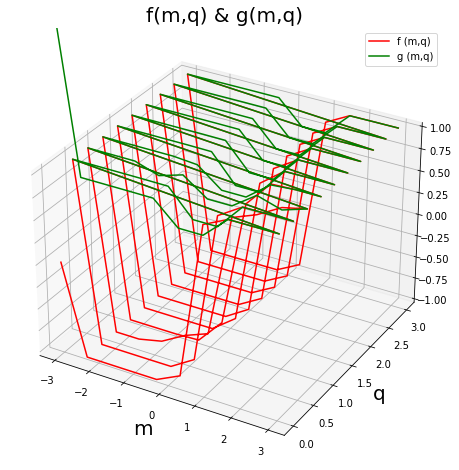

In [5]:
a = 0.1
b = 4

args = {
    "m_min": -3,
    "m_max": 3,
    "q_min": 0,
    "q_max": 3,
}
plot_f_and_g(plot_num=10, zlim=(-1.0, 1.0), args=args)

-0.4529332469146208
0.4529332469146208
-0.4529332469146208
0.4529332469146208
-0.4529332469146208
0.4529332469146208
-0.4529332469146208
0.4529332469146208
-0.4529332469146208
0.4529332469146208
0.4529332469146208
0.4529332469146208
0.4529332469146208
0.4529332469146208
0.4529332469146208
0.4529332469146208
0.4529332469146208
0.4529332469146208
0.4529332469146208
0.4529332469146208
-0.4529332469146208
0.4529332469146208
-0.4529332469146208
0.4529332469146208
-0.4529332469146208
0.4529332469146208
-0.4529332469146208
0.4529332469146208
-0.4529332469146208
0.4529332469146208
0.4529332469146208
0.4529332469146208
0.4529332469146208
0.4529332469146208
0.4529332469146208
0.4529332469146208
0.4529332469146208
0.4529332469146208
0.4529332469146208
0.4529332469146208
-0.4529332469146208
0.4529332469146208
-0.4529332469146208
0.4529332469146208
-0.4529332469146208
0.4529332469146208
-0.4529332469146208
0.4529332469146208
-0.4529332469146208
0.4529332469146208
0.4529332469146208
0.45293324691462

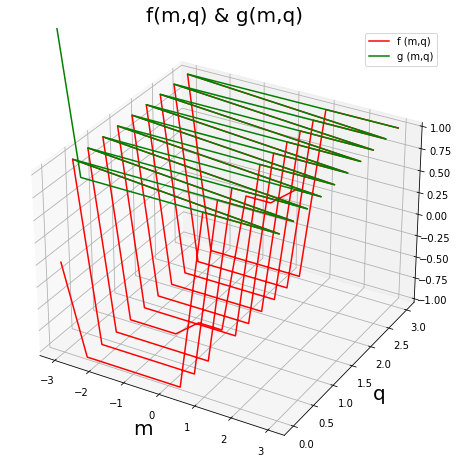

In [6]:
a = 0.5
b = 1000

args = {
    "m_min": -3,
    "m_max": 3,
    "q_min": 0,
    "q_max": 3,
}
plot_f_and_g(plot_num=10, zlim=(-1.0, 1.0), args=args)